# Статистика, DS-поток
## Задание SP.5

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  80 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1, 2;
* *средне-высокая:* задача 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.


In [1]:
# Bot check

# HW_ID: ds_sp5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

-----

## Задача 1.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $\textrm{MSE}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$\textrm{MSE}_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta)$$
$$\textrm{bias}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \widehat{\theta} - \theta; $$
$$\textrm{var}_{\widehat{\theta}} (\theta) = \mathsf{D}_{\theta} \widehat{\theta}.$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{c_n X_{(n)}, c_n\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 
Из домашнего задания ST5:

$$p_{X_{(n)}}(t) = \frac{n}{\theta}\left(\frac{t}{\theta}\right)^{n-1}$$

$$\mathbb E(X_{(n)}) = \frac{n}{n+1}\theta$$

$$\mathbb E(X_{(n)}^2) = \frac{n}{n+2}\theta^2$$

Откуда

$$\mathbb D (X_{(n)}) = \mathbb E(X_{(n)}^2) - [\mathbb E(X_{(n)})]^2 = \frac{n}{n+2}\theta^2 - \frac{n^2}{(n+1)^2}\theta^2 = \frac{n}{(n+1)^2(n+2)}\theta^2$$


$$\textrm{bias}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} [c_n X_{(n)}] - \theta = \frac{c_n n}{n+1}\theta - \theta$$
$$\textrm{var}_{\widehat{\theta}} (\theta) = \mathsf{D}_{\theta} [c_n X_{(n)}] = \frac{c_n^2 n}{(n+1)^2(n+2)}\theta^2$$

$$\textrm{MSE}_{\widehat{\theta}} (\theta) = \theta^2 \left(\frac{c_n^2 n}{(n+1)^2(n+2)} + \left(\frac{c_n n}{n+1} - 1\right)^2 \right)$$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое значение $c_n$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

1) Несмещенная оценка:

$$\textrm{bias} = \theta \left( c_n\frac{n}{n + 1} - 1\right) = 0 \Rightarrow c_n = \frac{n+1}{n}$$

2) Минимум функции риска:

$$MSE = \theta^2 \left(\frac{c_n^2 n}{(n+1)^2(n+2)} + \left(\frac{c_n n}{n+1} - 1\right)^2 \right)$$

То есть нужен минимум квадратичной от $c_n$ функции:

$$c_n^2 \left(\frac{n}{(n+1)^2(n+2)} + \frac{n^2}{(n+1)^2}\right) - c_n \frac{2n}{n+1} + 1 $$


$$c_n^2 \frac{n + n^2(n+2)}{(n+1)^2(n+2)} - c_n \frac{2n}{n+1} + 1 $$

$$c_n^2 \frac{n(n^2 + 2n + 1)}{(n+1)^2(n+2)} - c_n \frac{2n}{n+1} + 1 $$

$$c_n^2 \frac{n}{(n+2)} - c_n \frac{2n}{n+1} + 1 $$

Минимум достигается при

$$c_n = \frac{2n}{2(n+1)} \frac{n+2}{n} = \frac{n+2}{n+1}$$

3) Оценка максимального правдоподобия:

Как из домашки, функция правдоподобия
$$L_x(\theta) = \frac{1}{\theta^n} I\{X_{(n)} \leq \theta\}$$

Откуда максимум при минимальном $\theta$, ее не зануляющим, то есть $\widehat \theta = X_{(n)}$, что соответствует $c_n$ = 1

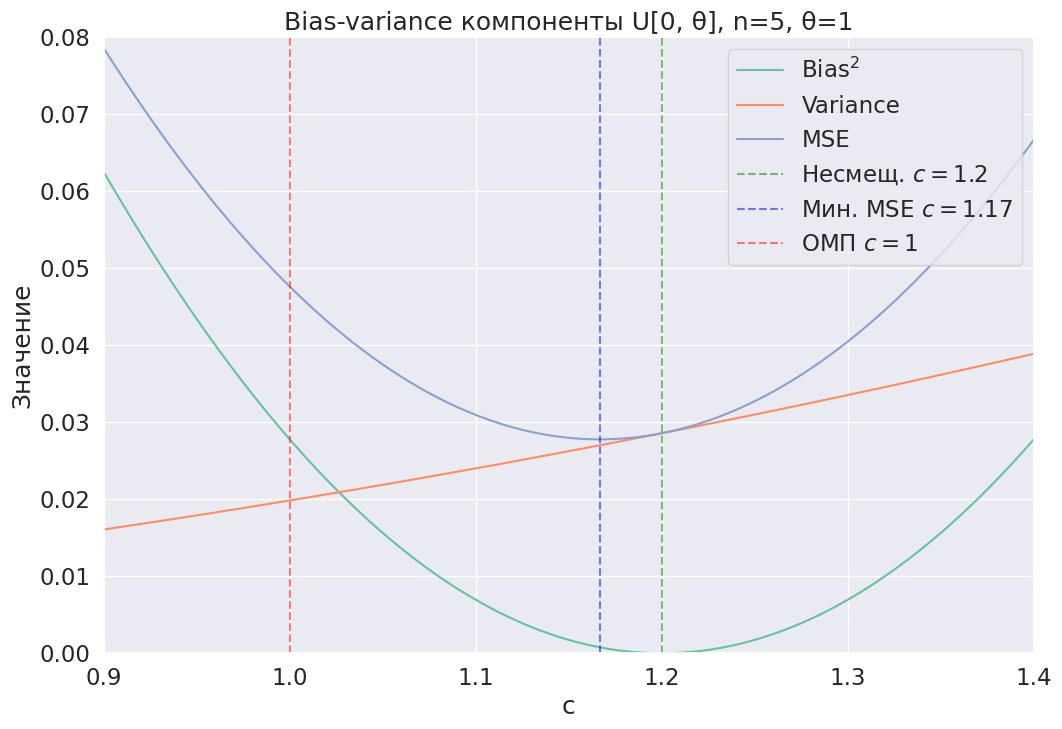

In [3]:
n = 5
theta = 1
c = np.linspace(0.9, 1.4, 1000)

bias = c * n / (n + 1) - 1
variance = c ** 2 * n / ((n + 1) ** 2 * (n + 2))

mse = bias ** 2 + variance

c_unbaised = (n + 1) / n
c_mse = (n + 2) / (n + 1)
c_mle = 1

plt.figure(figsize=(12, 8))
plt.plot(c, bias ** 2, label=r'Bias$^2$')
plt.plot(c, variance, label='Variance')
plt.plot(c, mse, label='MSE')

plt.axvline(x=c_unbaised, linestyle='--',
            label=r'Несмещ. $c={:.1f}$'.format(c_unbaised), color='green', alpha=0.5)
plt.axvline(x=c_mse, linestyle='--',
            label=r'Мин. MSE $c={:.2f}$'.format(c_mse), color='blue', alpha=0.5)
plt.axvline(x=c_mle, linestyle='--',
            label=r'ОМП $c={:.0f}$'.format(c_mle), color='red', alpha=0.5)

plt.xlim(0.9, 1.4)
plt.ylim(0, 0.08)
plt.xlabel('c')
plt.ylabel('Значение')
plt.title('Bias-variance компоненты U[0, θ], n=5, θ=1')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

**Вывод:** 

1) Variance линейно зависит от $c$, а bias и MSE - квадратично (и у обоих есть минимумы, однако не совпадающие)

2) Несмещенная оценка смещена относительно минимума MSE за счет variance компоненты

3) Больше всего от этих двух оценок смещена ОМП

4) Для каждой задачи может потребоваться более аккуратный выбор оценки параметра. Может понадобиться несмещенность оценки (как например для стохастического градиентного спуска в одной из домашек), а может понадобиться минимизация функции риска  - в зависимости от требований - возможный риск может оказаться очень критичным

5) Можно заметить, что несмещенная оценка есть точка касания графиков MSE и var (что логично, т.к. bias=0)

*b).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, где $a$ и $\sigma$ неизвестны. Для величины $\sigma^2$ рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c_n}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:**

Из домашнего задания SP5 (и семинара):

$$\textrm{bias}_{\widehat{\theta}} (\theta) = \sigma^2 \left[ \frac{n-1}{c_n} - 1\right]$$
$$\textrm{var}_{\widehat{\theta}} (\theta) = \sigma^4 \frac{2(n-1)}{c_n^2}$$

$$MSE = \sigma^4 \left( \left[ \frac{n-1}{c_n} - 1\right]^2 + \frac{2(n-1)}{c_n^2}\right)$$

1) Несмещенная оценка при $c_n = n - 1$
2) MSE лучшая (**будем называть ее c/к**) при $c_n = n+1$
3) ОМП при $c_n = n$

Повторите исследование, аналогичное пункту *a)* для $a = 0, \sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика рядом с помощью функции `plt.subplot`. Не забудьте сделать выводы.

**Решение:**

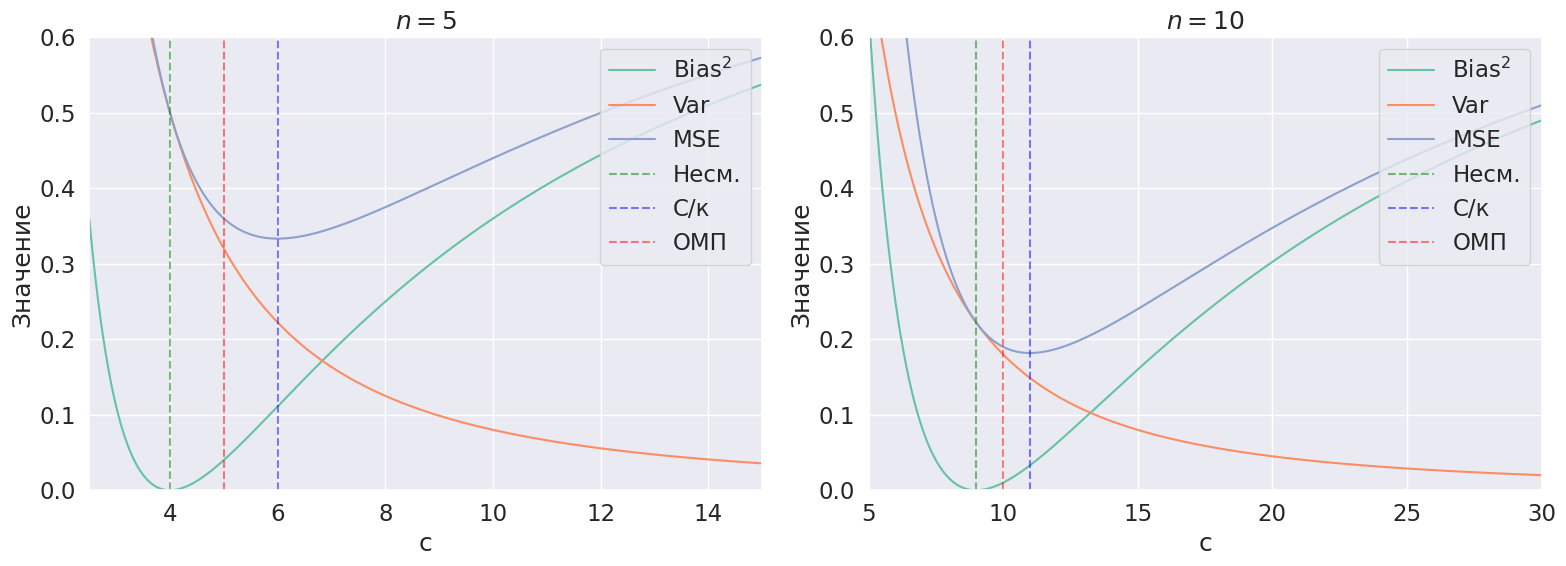

In [4]:
def plot_bias_variance_mse(n, sigma_squared=1):
    c = np.linspace(n - n/2, n + 2*n, 1000)

    bias = sigma_squared * ((n - 1) / c - 1)
    variance = sigma_squared ** 2 * 2 * (n - 1) / c ** 2
    mse = bias ** 2 + variance

    c_unbiased = n - 1
    c_mse = n + 1
    c_mle = n

    plt.plot(c, bias ** 2, label=r'Bias$^2$')
    plt.plot(c, variance, label='Var')
    plt.plot(c, mse, label='MSE')

    plt.axvline(x=c_unbiased, linestyle='--', label=f'Несм.', color='green', alpha=0.5)
    plt.axvline(x=c_mse, linestyle='--', label=f'С/к', color='blue', alpha=0.5)
    plt.axvline(x=c_mle, linestyle='--', label=f'ОМП', color='red', alpha=0.5)

    plt.xlim(np.min(c), np.max(c))
    plt.ylim(0, 0.6)
    plt.xlabel('c')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.title(f'Bias-variance компоненты для $n={n}$')

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plot_bias_variance_mse(n=5)
plt.title(r'$n=5$')

plt.subplot(1, 2, 2)
plot_bias_variance_mse(n=10)
plt.title(r'$n=10$')

plt.tight_layout()
plt.show()

**Вывод:** 
1) С увеличением $c$ убывает $variance$, а $bias^2$ и $MSE$ имеют $U$-образные формы

2) В этот раз значения $c$ не так сильно отличаются друг от друга, при этом ОМП посередине между несмещенной и минимизурующей MSE, и не отдалена от них так сильно.

3) Такой же характер сохранается с ростом выборки

Сделайте вывод по результатам пунктов *a)*, *b)*.

**Общий вывод:**

1) Важно выбирать правильно класс оценок и саму оценку из них, в зависимости от нужд - нужна ли несмещенность, нужна ли минимизация функции риска и тому подобное.
2) Минимизация MSE соответствует некоторому балансному значению между bias и variance, это дает более глубокое понимание характера оценок.


---
## Задача 2.
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

**Решение:**

Функции для оценок и лоссы

In [5]:
def quadratic_loss(estimate, theta):
    return (estimate - theta[:, np.newaxis]) ** 2

def abs_loss(estimate, theta):
    return np.abs(estimate - theta[:, np.newaxis])

def estimate_1(X):
    return 2 * np.mean(X, axis=2)

def estimate_2(X, n_samples):
    return (n_samples + 1) * np.min(X, axis=2)

def estimate_3(X):
    return np.min(X, axis=2) + np.max(X, axis=2)

def estimate_4(X, n_samples):
    return (n_samples + 1) / n_samples * np.max(X, axis=2)

Сам эксперимент

In [6]:
theta_range = np.arange(0.01, 2.01, 0.01)
n_samples = 100
n_experiments = 5000

R_quadratic = { r'$2\overline{X}$': [], r'$(n+1)X_{(1)}$': [], r'$X_{(1)} + X_{(n)}$': [], r'$\frac{n+1}{n} X_{(n)}$': [] }
R_abs = { r'$2\overline{X}$': [], r'$(n+1)X_{(1)}$': [], r'$X_{(1)} + X_{(n)}$': [], r'$\frac{n+1}{n} X_{(n)}$': [] }

X = np.random.uniform(0, theta_range[:, np.newaxis, np.newaxis],
                      (len(theta_range), n_experiments, n_samples))

estimates = np.array([estimate_1(X), estimate_2(X, n_samples),
                      estimate_3(X), estimate_4(X, n_samples)])

losses_quadratic = np.array([quadratic_loss(estimates[i], theta_range) for i in range(4)])
losses_abs = np.array([abs_loss(estimates[i], theta_range) for i in range(4)])

for i, label in enumerate(R_quadratic.keys()):
    R_quadratic[label] = np.mean(losses_quadratic[i], axis=1)
    R_abs[label] = np.mean(losses_abs[i], axis=1)

И графики

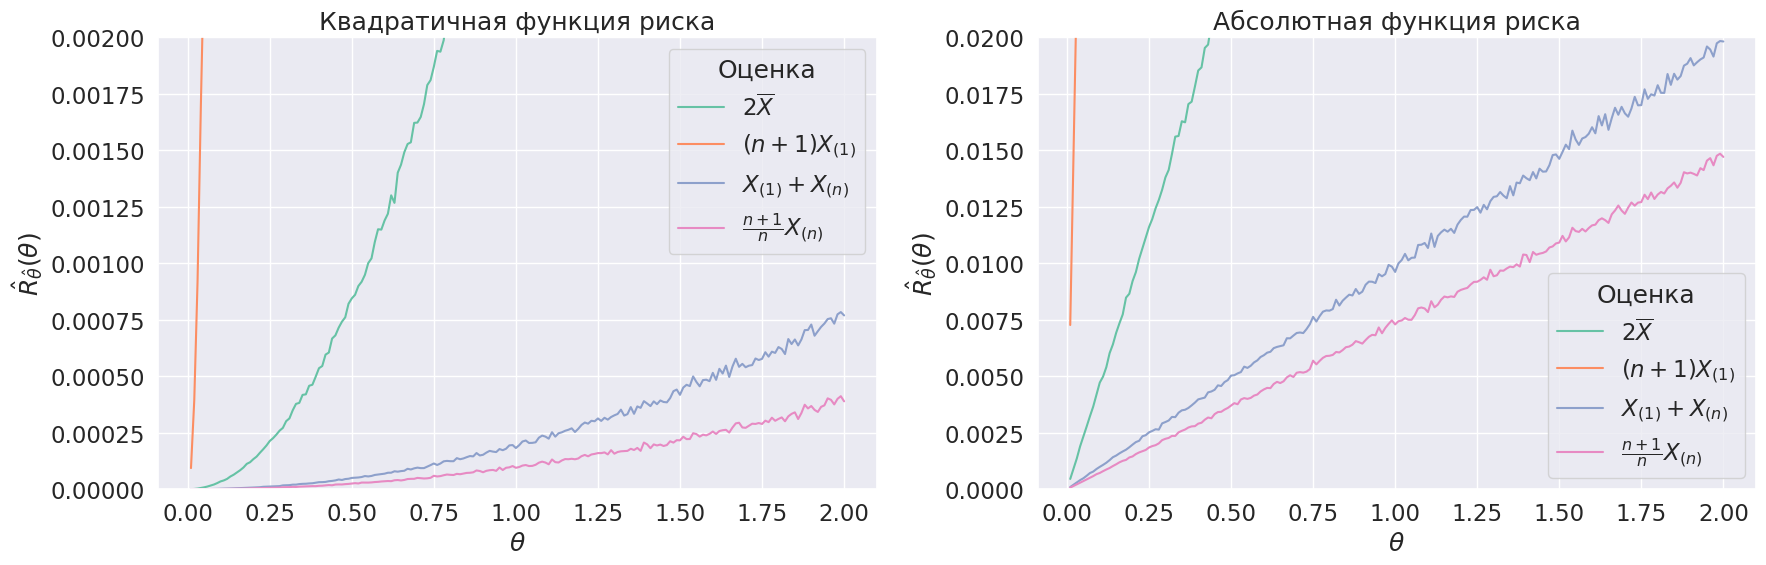

In [7]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
for label in R_quadratic.keys():
    plt.plot(theta_range, R_quadratic[label], label=label)
plt.title('Квадратичная функция риска')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat{R}_{\hat{\theta}}(\theta)$')
plt.ylim(0, 0.002)
plt.legend(title='Оценка')

plt.subplot(1, 2, 2)
for label in R_abs.keys():
    plt.plot(theta_range, R_abs[label], label=label)
plt.title('Абсолютная функция риска')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat{R}_{\hat{\theta}}(\theta)$')
plt.ylim(0, 0.02)
plt.legend(title='Оценка')


plt.tight_layout()
plt.show()


Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** 

Выходит, что по обоим методам оценки риска (и по модулям, и по квадрату) разница между оценками одинаковая и такая:

$\frac{n+1}{n} X_{(n)}$ несколько лучше $X_{(1)}+X_{(n)}$

$X_{(1)}+X_{(n)}$ намного лучше $2\overline{X}$

$2\overline{X}$ намного лучше $(n+1)X_{(1)}$

И стоит использовать оценку $\frac{n+1}{n} X_{(n)}$ среди всех предложенных

Таким образом, выбор оценки может оказаться нетривиальной задачей: следует предварительно сравнить возможные оценки между собой, перед тем, как выбрать наиболее подходящую

---
###  Задача 3.
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.
В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$
Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

**1.** Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Численно посчитайте долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

1) Так как $\mathbb E (X_i) = \mathbb E (\overline X) = \theta$ и $\mathbb D(X_i) = \theta (1-\theta)$ то

   $$MSE_{\overline{X}} (\theta) = \mathbb E \left( \overline X - \mathbb E (\overline X)  \right)^2 = \mathbb D (\overline X) = \frac{\theta (1- \theta)}{n}$$

2) В домашнем задании ST5 была выведена формула

  $$MSE_{\widetilde{\theta}} (\theta) = \frac{1}{4(\sqrt n + 1)^2}$$

Осталось построить графики

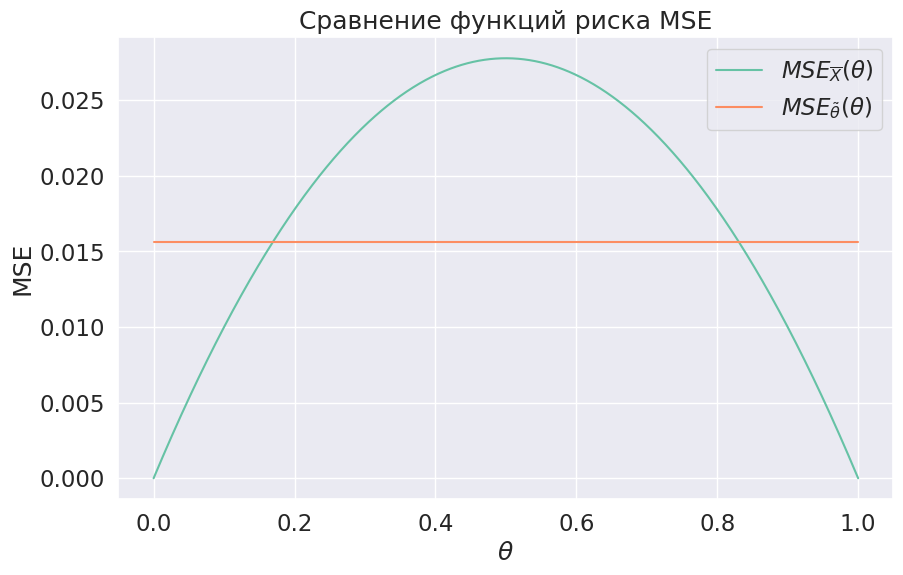

In [8]:
n = 9
theta = np.linspace(0, 1, 1000)

MSE_mean = (theta * (1 - theta)) / n
MSE_hodges = 1 / (4 * (np.sqrt(n) + 1) ** 2) * np.ones(1000)

plt.figure(figsize=(10, 6))
plt.plot(theta, MSE_mean, label=r'$MSE_{\overline{X}}(\theta)$')
plt.plot(theta, MSE_hodges, label=r'$MSE_{\tilde{\theta}}(\theta)$')
plt.title('Сравнение функций риска MSE')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.legend()
plt.show()

И подсчет доли

In [9]:
proportion = np.mean(MSE_hodges < MSE_mean)
print(f'Доля θ, при которых MSE Ходжеса-Лемана лучше среднего выборочного: {proportion:.2f}')
print(f'Интервал θ, при которых MSE Ходжеса-Лемана лучше среднего выборочного: ({0.5 - proportion / 2:.2f}, {0.5 + proportion / 2:.2f})')

Доля θ, при которых MSE Ходжеса-Лемана лучше среднего выборочного: 0.66
Интервал θ, при которых MSE Ходжеса-Лемана лучше среднего выборочного: (0.17, 0.83)


**Ответ:**

Как видно, среднее выборочное выигрывает при значениях $\theta$, близких к $0$ или $1$, а оценка Ходжеса-Лемана выигрывает при близких к 1/2

График MSE это перевернутая парабола, симметричная относительно 1/2, а для Ходжеса-Лемана - константа.

Примерный интервал, где Ходжес-Леман выигрывает: $(0.17, 0.83)$, это примерно $66\%$ всех значений $\theta$

**2.** Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение:**

In [10]:
n = 9
num_samples = 1000

theta = np.random.uniform(0, 1, num_samples)

X = np.array([np.random.binomial(1, theta, n) for theta in theta])

X_mean = X.mean(axis=1)

Hodges = X_mean + (1 / (1 + np.sqrt(n))) * (0.5 - X_mean)

MSE_mean = (X_mean - theta) ** 2
MSE_hodges = (Hodges - theta) ** 2

proportion_better = np.mean(MSE_hodges < MSE_mean)

print(f'Доля θ, когда оценка Ходжеса-Лемана лучше: {proportion_better:.3f}')

Доля θ, когда оценка Ходжеса-Лемана лучше: 0.521


**Вывод:** 

Результат отличается от предыдущего, хоть по порядку и похож. Дело в том, что в прошлый раз для каждого значения θ мы сравнивали матожидание функции риска, и затем сравнивали, а в этот раз для каждого θ мы смотрим 1 реализацию выборки и сравниваем по ней функции риска. 

Матожидание функции риска и сама функция риска в конкретной реализации выборки могут сильно различаться. 

**3.**  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 - \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрична относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.
Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ окажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода Монте-Карло. Сделайте выводы.

**Решение:**

Построим график (пользуясь тем, что $\overline X * n$ это сумма $X_i$, а то есть биномиальное распределение):

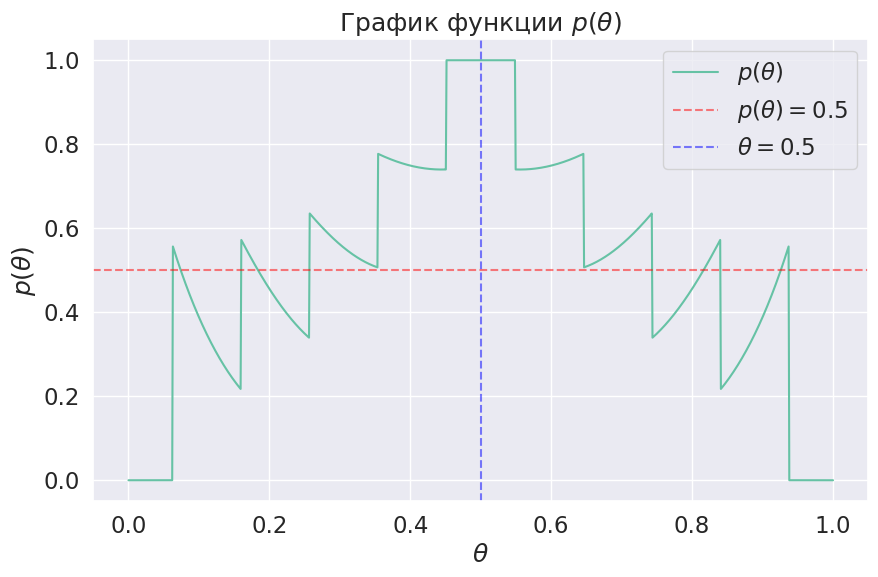

In [11]:
def p(theta, n):
    d_n = 1 / (4 * (1 + np.sqrt(n)))
    theta_copy = np.where(theta > 0.5, 1 - theta, theta)
    p_values = np.zeros_like(theta)
    
    lower_bound = (theta_copy - d_n) / (1 - 2 * d_n)
    upper_bound = 0.5

    # X_mean * n - это биномиальное распределение из n испытаний
    return 1 - (sps.binom.cdf(upper_bound * n, n, theta_copy) - sps.binom.cdf(lower_bound * n, n, theta_copy))

theta = np.linspace(0, 1, 1000)
p_values = p(theta, 9)

plt.figure(figsize=(10, 6))
plt.plot(theta, p_values, label=r'$p(\theta)$')
plt.title(r'График функции $p(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.axhline(0.5, linestyle='--', label=r'$p(\theta)=0.5$', color='red', alpha=0.5)
plt.axvline(0.5, linestyle='--', label=r'$\theta=0.5$', color='blue', alpha=0.5)
plt.legend()

Осталось посчитать интеграл:

In [12]:
def monte_carlo_p(num_samples, n):
    theta = np.random.uniform(0, 1, num_samples)
    p_values = p(theta, n)
    return np.mean(p_values)

print(f'Оценка вероятности p_*: {monte_carlo_p(10000, 9):.3f}')

Оценка вероятности p_*: 0.507


**Ответ:** 

Теперь зависимость от $\theta$ не такая очевидная (вероятность того, что одна из оценок лучше против сравнения матожиданий в задаче 1)

При этом вероятность $p_{-}^*$ совпадает с результатом задачи 2 в рамках погрешностей. Действительно, это ровно то что и происходило в прошлой задаче: мы для конкретных реализаций выборок сравниваем точность оценок между собой.

Сам график $p(\theta)$ напоминает график в первом пункте задачи - это тоже перевернутый колокол, симметричный относительно 1/2 с максимумом там. Опять, при критичных значениях выигрывает метод выборочного среднего, а при 1/2 - Ходжес-Леман, что совпадает с результатом задачи 1. Однако, в этот раз график не гладкий, с резкими скачками и ступеньками, и Ходжес-Леман теперь выигрывает на чуть меньшем интервале. Ступеньки появляются из-за функции распределения биномиальной случайной величины (имеющей ступенчатый вид)

**4.** Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

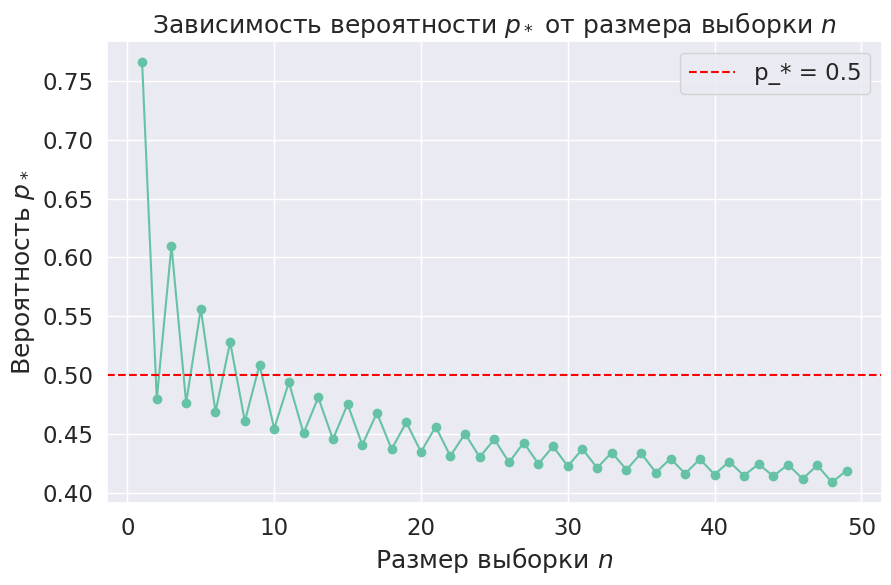

In [13]:
sample_sizes = range(1, 50)
p_star_values = [monte_carlo_p(50000, n) for n in sample_sizes]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, p_star_values, marker='o')
plt.title("Зависимость вероятности $p_*$ от размера выборки $n$")
plt.xlabel("Размер выборки $n$")
plt.ylabel("Вероятность $p_*$")
plt.axhline(y=0.5, color='r', linestyle='--', label='p_* = 0.5')
plt.legend()

**Ответ:**

Как видно, оценка Ходжеса-Лемана выигрывает в большей части значений $\theta$ только для маленьких $n$, а при больших $n$ проигрывает. Перелом наступает примерно для $n = 10$. 

**Вывод по задаче:** 

1) Для маленьких выборок оценка Ходжеса-Лемана оказывается лучше для довольно широкого интервала значений $\theta$ (больше половины, от $0.5$ до $0.75$)

2) С ростом размера выборки этот интервалл уменьшается

3) В целом, Ходжес-Леман остается лучшим выбором при любом размере выборки, если $\theta$ близко к $1/2$ (как видно, уже при довольно большой выборке размером 50 Ходжес выигрывает в 0.4 доли $\theta$)

4) Если значения $\theta$ близки к критическим, $0$ или $1$, то $\overline X$ остается лучшим выбором при любом размере выборки, однако интервал значений $\theta$, где он выгрывает, растет с ростом выборки

**Вывод по всей SP5:** 

Нужно аккуратно выбирать оценки параметров распределения

1) Есть некоторые характеристики оценок, которые могут оказаться ключевыми в выборке оценки - напр. несмещенность / функция риска

2) Мы можем изначально предполагать, например, что параметр распределения близок/далек от критического; либо пользоваться размером выборки, это может повлиять на выбор оценки - для каждого случая может лучше подойти своя (некоторые параметры самой задачи, по которой мы делаем выбор) - что логично, ведь мы уже будем рассматривать частный случай.